In [1]:
import pandas as pd

In [2]:
base_treino = pd.read_csv('train.csv')

In [3]:
base_treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
base_treino.shape
#importante verificar pra entender que essa base pode sofrer um overfitting

(1460, 81)

In [5]:
base_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#verificando valores vazios
(base_treino.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
(base_treino.isnull().sum()/base_treino.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [8]:
#eliminando colunas com mais de 10% vazios
eliminadas = base_treino.columns[base_treino.isnull().sum()/base_treino.shape[0]>0.1]
eliminadas

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
base_treino = base_treino.drop(eliminadas, axis = 1)

In [10]:
#retirando valores vazios para dados inexistentes
base_treino = base_treino.fillna(-1)

In [11]:
(base_treino.isnull().sum()/base_treino.shape[0]).sort_values(ascending=False).head(3)

Id             0.0
GarageYrBlt    0.0
Fireplaces     0.0
dtype: float64

In [12]:
#seleção de colunas numéricas

col_num = base_treino.columns[base_treino.dtypes != 'object']
col_num

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
#criando noa tabela com colunas que não possuem dados do tipo objeto
base_treino = base_treino.loc[:,col_num]

In [14]:
base_treino.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [15]:
base_treino.shape

(1460, 37)

### Criando o modelo
#### Separando em treino e teste

In [16]:
X = base_treino.drop('SalePrice', axis = 1)
y = base_treino.SalePrice

In [17]:
#importando o train test split
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

##### Seleção de algoritmos
##### iniciaremos pelos mais simples


##### Regressão Linear

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#criando o regressor
reg_rl = LinearRegression().fit(X_train,y_train)

In [21]:
#previsão
y_pred_rl = reg_rl.predict(X_test)

##### Árvore de decisão

In [22]:
from sklearn import tree

In [23]:
reg_ad = tree.DecisionTreeRegressor().fit(X_train,y_train)

In [24]:
y_pred_ad = reg_ad.predict(X_test)

##### KNeighbors Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)

In [27]:
y_pred_knn = reg_knn.predict(X_test)

#### Avaliando os modelos

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
#regressão linear
print(mean_absolute_error(y_test,y_pred_rl))
print(mean_squared_error(y_test,y_pred_rl))

23763.18739306408
1533982883.4448242


In [31]:
#arvore de decisao
print(mean_absolute_error(y_test,y_pred_ad))
print(mean_squared_error(y_test,y_pred_ad))

28995.46265560166
2432097977.748963


In [32]:
#KNN
print(mean_absolute_error(y_test,y_pred_knn))
print(mean_squared_error(y_test,y_pred_knn))

33273.08298755187
2733937586.841286


In [33]:
#plotando a relação entre y_tes e y_preds
import matplotlib.pyplot as plt

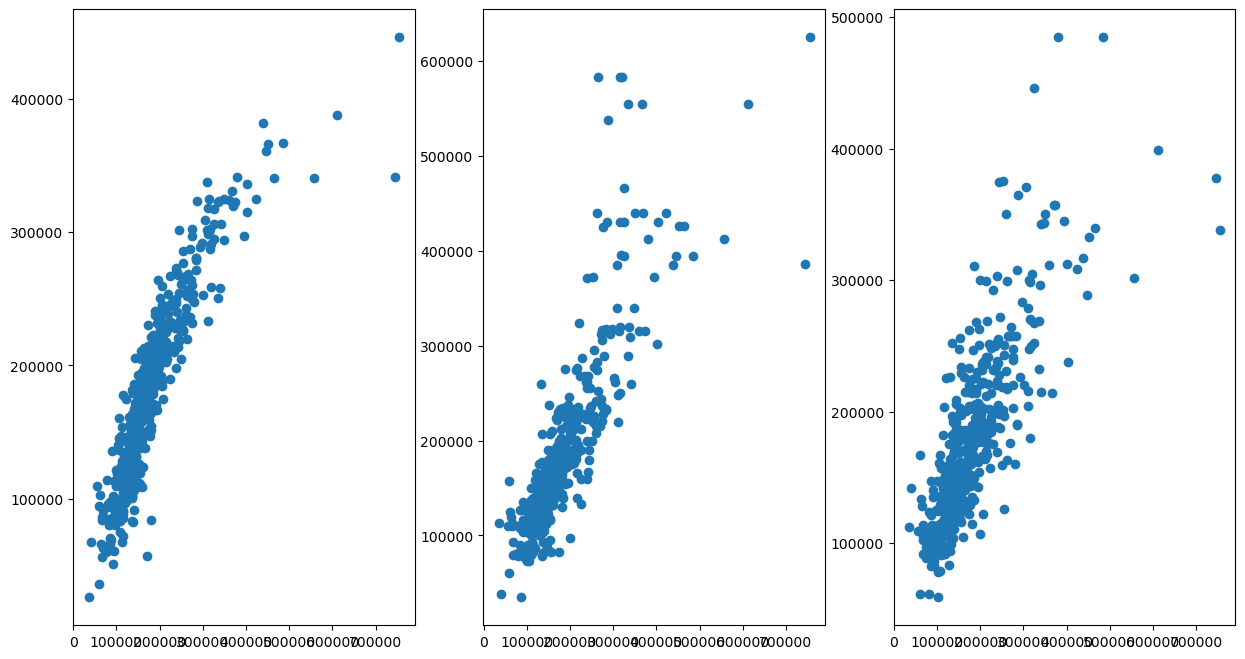

In [34]:
fig, ax = plt.subplots(ncols=3,figsize=(15,8))

ax[0].scatter(y_test,y_pred_rl)
ax[1].scatter(y_test,y_pred_ad)
ax[2].scatter(y_test,y_pred_knn)

plt.show()

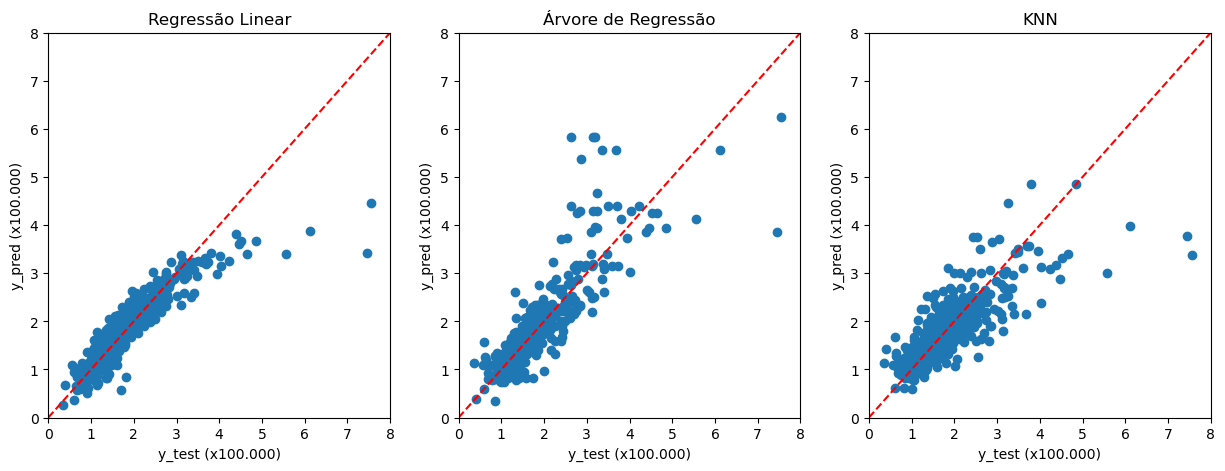

In [35]:
#arrumando o gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))
                       
ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

In [36]:
base_teste = pd.read_csv('test.csv')

In [37]:
base_teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [38]:
#eliminando as mesmas colunas
base_teste = base_teste.drop(eliminadas, axis = 1)

In [39]:
col_num_test = base_teste.columns[base_teste.dtypes != 'object']
col_num_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [40]:
base_teste = base_teste.loc[:,col_num_test]

In [41]:
base_teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [42]:
#visualizando valores vazios
base_teste.isnull().sum().sort_values(ascending=False).head(12)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
WoodDeckSF       0
dtype: int64

In [43]:
#substituindo esses valores vazios por -1
base_teste = base_teste.fillna(-1)

In [44]:
base_teste.isnull().sum().sort_values(ascending=False).head(3)

Id              0
MSSubClass      0
BedroomAbvGr    0
dtype: int64

In [45]:
#usando o modelo criado anteriormente com os dados de treino
y_pred =reg_rl.predict(base_teste)

In [46]:
#adicionando coluna de previsão na base
base_teste['SalePrice'] = y_pred
base_teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,122234.995960
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,139178.263684
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,169872.054251


In [47]:
#extraindo apenas o Id e o SalePrice seguindo a sugestão do Kaggle para submissão
base_kaggle = base_teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [48]:
base_kaggle.to_csv('resultados1.csv',index = False)